In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from sklearn.models_selection import train_test_split


1.5.0


ModuleNotFoundError: No module named 'sklearn'

## Линейная модель

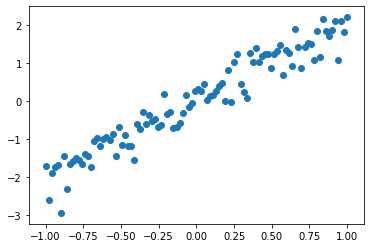

In [2]:
x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

plt.scatter(x_train, y_train)
plt.show()

W:2.014, b:0.019


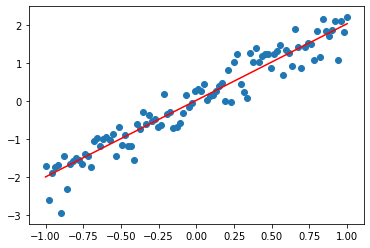

In [13]:
learning_rate = 0.01
training_epochs = 100

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w, b):
    return  tf.multiply(X, w) + b

w = tf.Variable(0.0, name = 'weights')
b = tf.Variable(0.0, name = 'bias')

y_model = model(X, w, b)
cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(x_train, y_train):
            sess.run(train_op, feed_dict={X: x, Y:y})
    # Получаем окончательные значения W и b      
    w_val = sess.run(w)
    b_val = sess.run(b)
    print('W:{:.3f}, b:{:.3f}'.format(w_val, b_val))
    
plt.scatter(x_train, y_train)
y_learned = x_train * w_val + b_val
plt.plot(x_train, y_learned, 'r')
plt.show()



## Полиномиальная модель

In [14]:
tf.reset_default_graph()

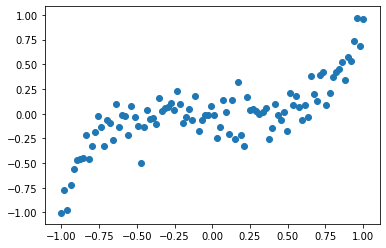

In [25]:
x_train = np.linspace(-1, 1, 100)
y_train = np.power(x_train, 5) + np.random.randn(*x_train.shape) * 0.15

plt.scatter(x_train, y_train)
plt.show()

W:[-0.02436568 -0.2158083   0.11882442  1.0473151  -0.07190698]


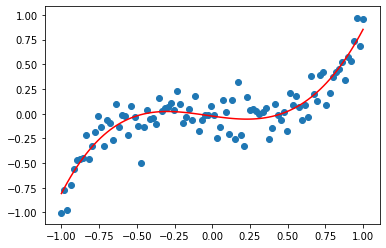

In [30]:
learning_rate = 0.01
training_epochs = 100
num_coeffs = 5

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    parts = []
    for i in range(num_coeffs):
        part = tf.multiply(w[i], tf.pow(X, i))
        parts.append(part)
    return tf.add_n(parts)

w = tf.Variable([0.] * num_coeffs, name='weights')
y_model = model(X, w)

cost = tf.square(Y - y_model)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(x_train, y_train):
            sess.run(train_op, feed_dict={X: x, Y:y})
    # Получаем окончательные значения W и b      
    w_val = sess.run(w)
    print('W:{}'.format(w_val))
    
plt.scatter(x_train, y_train)
y_learned = sum(w_val[i] * np.power(x_train, i) for i in range(num_coeffs))
plt.plot(x_train, y_learned, 'r')
plt.show()


## Регуляризация